## CS 495/595 Data Science with Python
### Take Home Examination
### Due Date:   4/5/2018



### Exercise 1: Generate fake data  using linear regression model with known parameters and some noise as shown below.



In [53]:
import numpy as np
# simulate a fake normal distribution values with given mean and standard deviation.
mean, stdDev = 5, 7
N = 1000 # number of samples to generate
x_1 = np.random.normal(mean, stdDev, N)
# generate normal noise with mean as 0 and standard deviation of $2$
trueError = np.random.normal(0, 2, N)
# beta parameters used for generating the data
trueBeta0 = 1.1 
trueBeta1 = -8.2 
# generate data 
y = trueBeta0 + trueBeta1 * x_1 + trueError

<ul>
<li> Plot the histogram of the fake data.  Use mlab.normpdf to add best-fit pdf. Also, make a scatter plot beween x_1 and y. 
<li> Build a regression model from scratch and demonstrate that it recovers the true values of $\beta$s. Repeat the exercise with Scikit Package.
<li>Create a new variable, Z, that is equal to x_1^2. Include this as one of the predictors in your model. See what happens when you fit a model that depends on x_1 only and then also on Z. For this exercise you will evaluate the model for different sample sizes starting from  100 to 5000 with an increment of 100 samples. You will split your samples into training and test set (80%/20%) using  "train_test_split" function available in the Scikit package. Plot the mean square error of the training set and of the test set versus sample sizes for both models (one with x_1 only and the other that includes Z). 


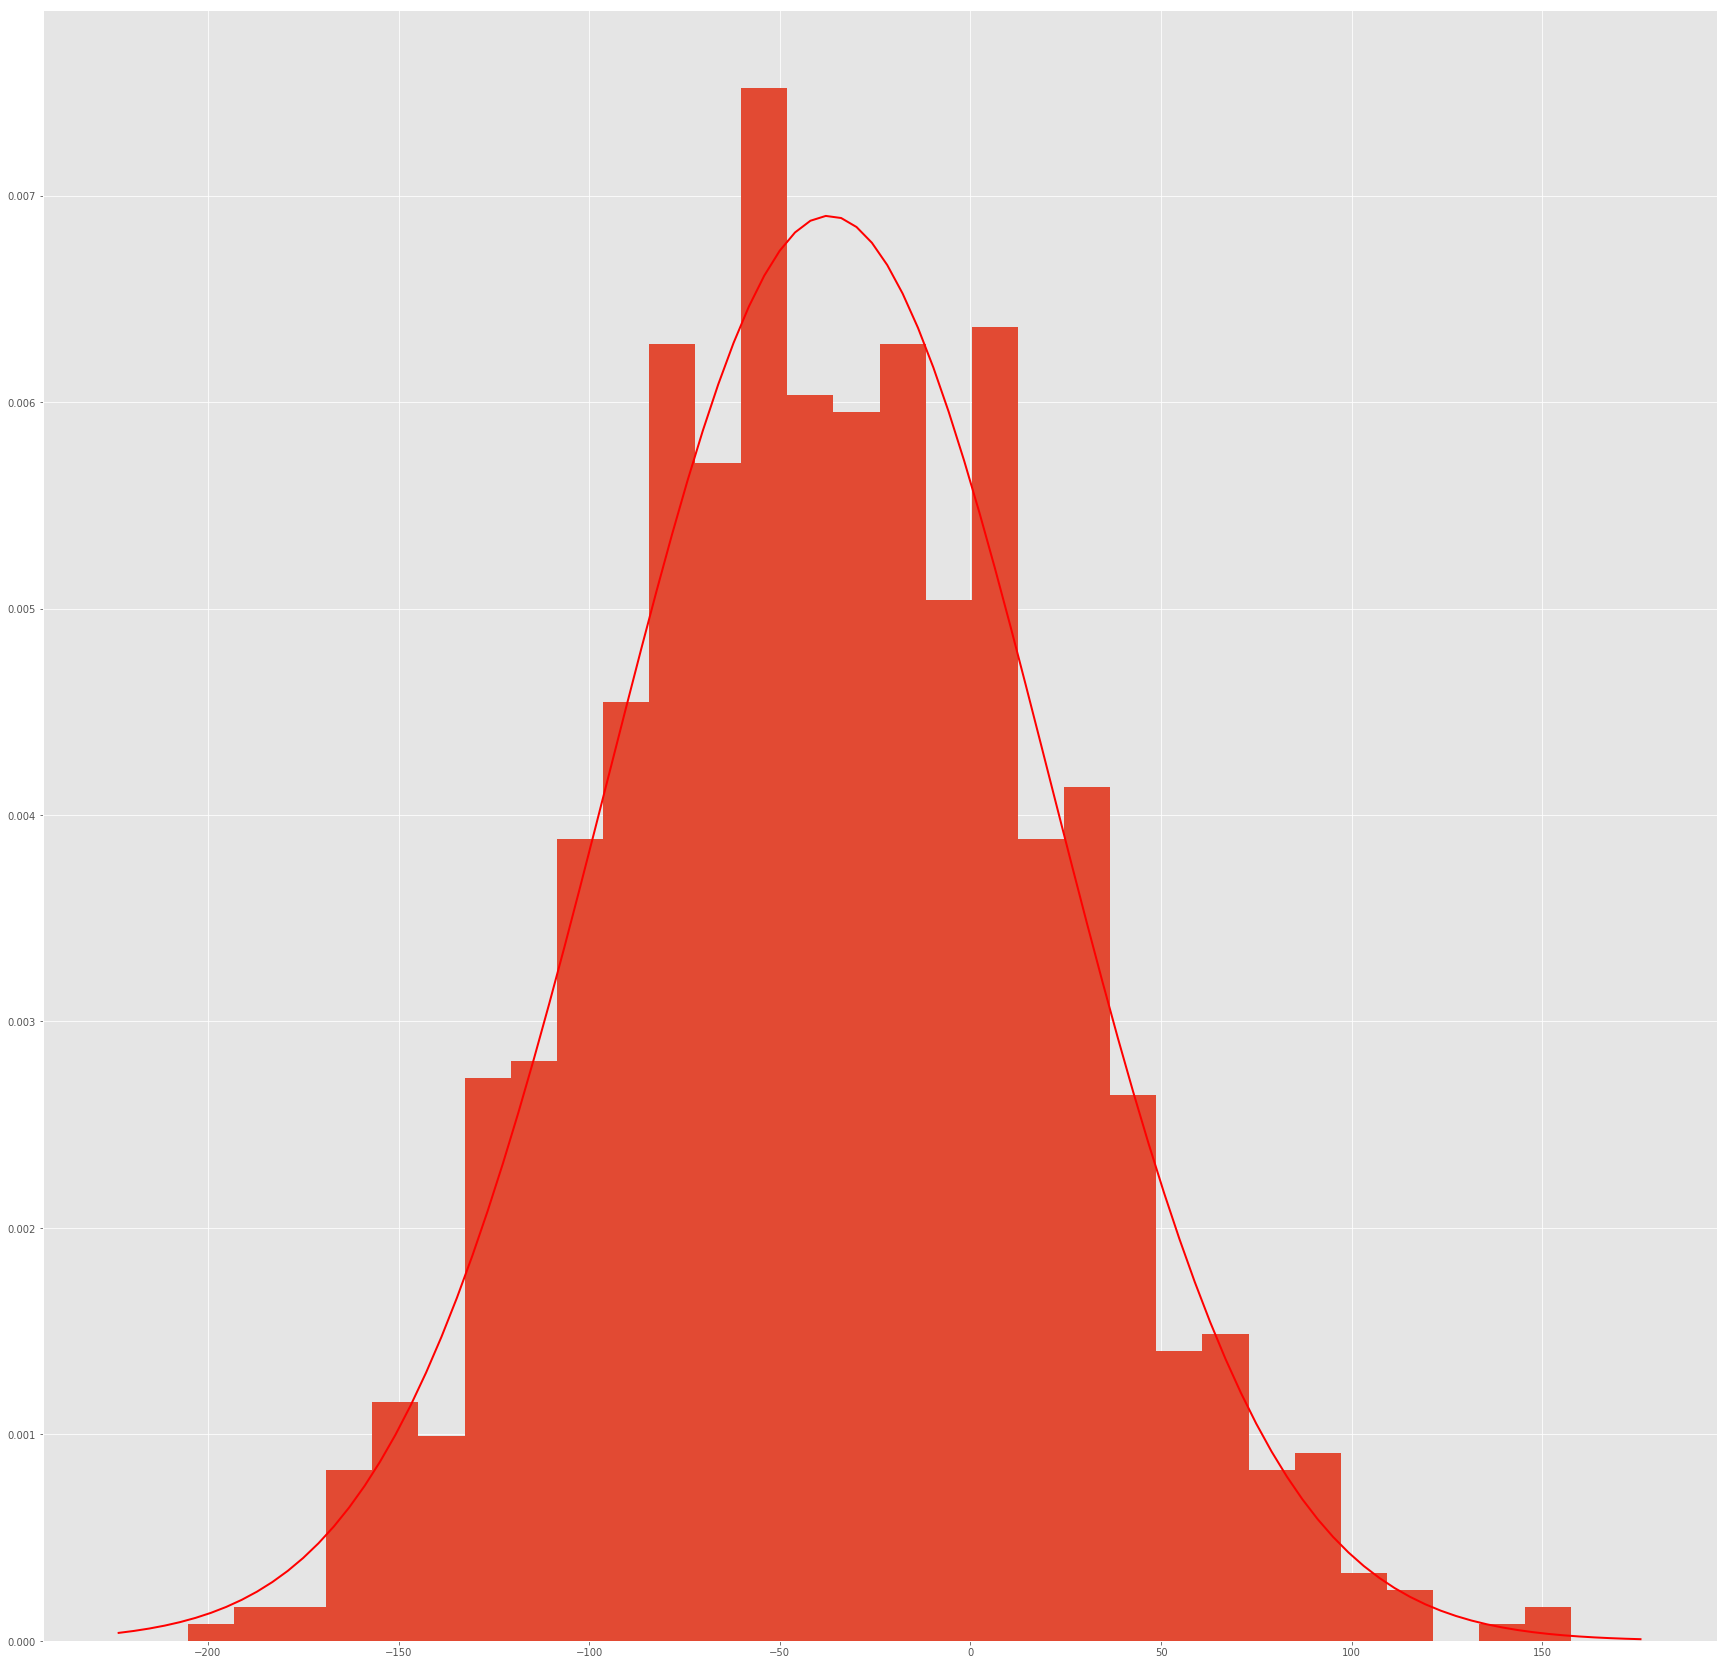

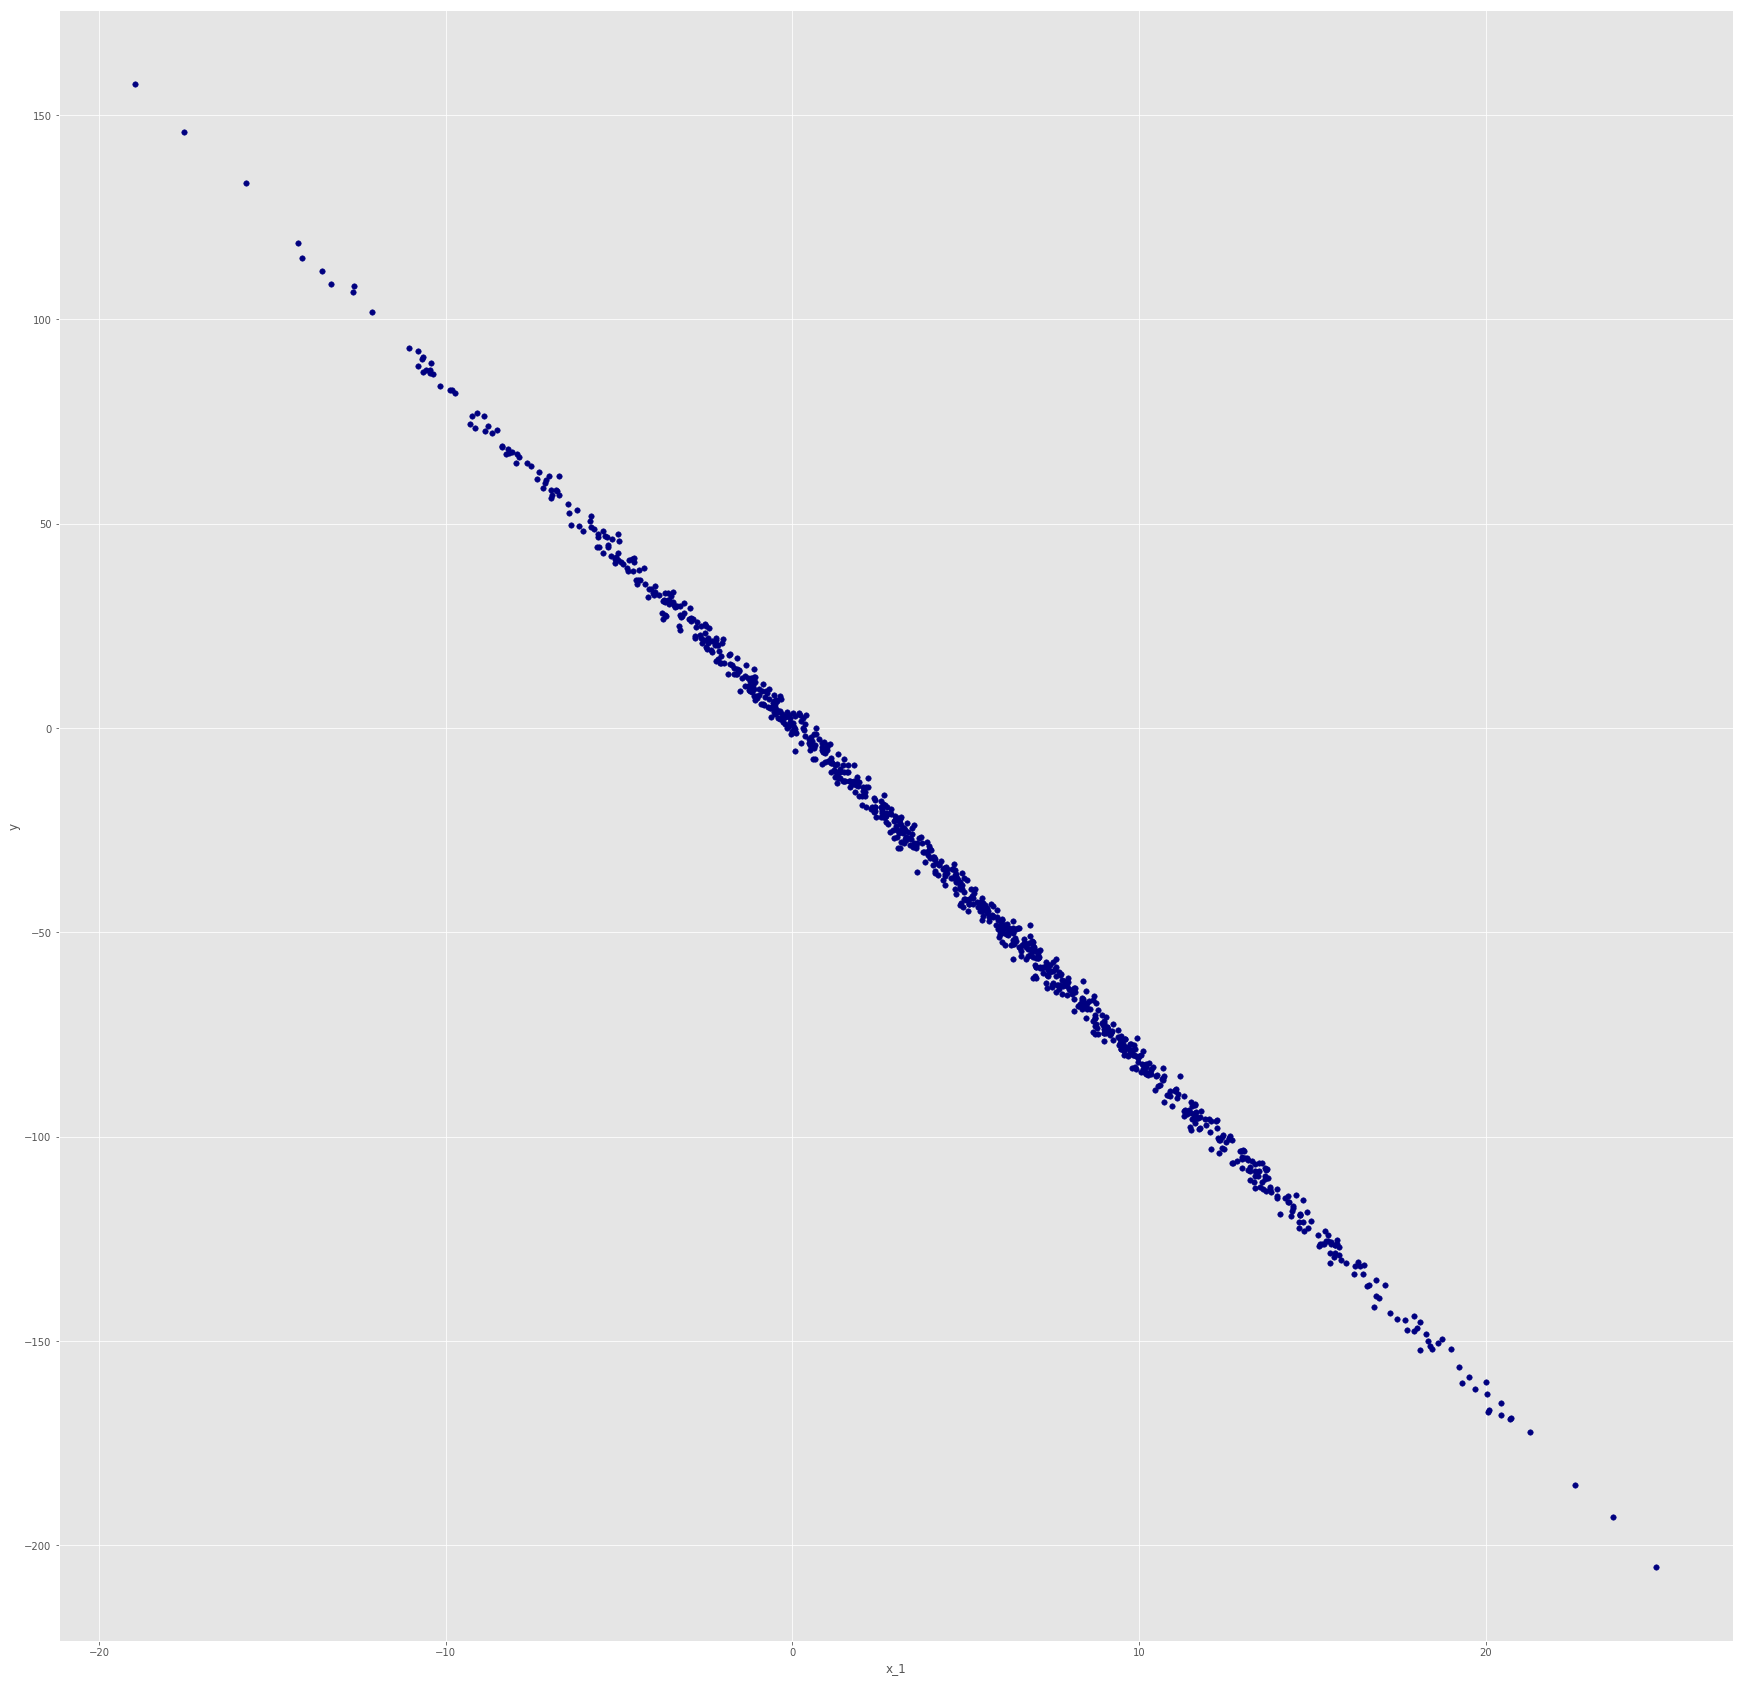

In [54]:
##Plot the histogram of the fake data.  
##Use mlab.normpdf to add best-fit pdf. Also, make a scatter plot beween x_1 and y.
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
histT, bin_edges = np.histogram(y, bins=30, density=True) 
plt.hist(y, normed=True, bins= bin_edges)
xmin, xmax = plt.xlim()
x=np.linspace(xmin,xmax,100)
p=mlab.normpdf(x,np.mean(y),np.std(y))
plt.plot(x,p,'r',linewidth=2)
plt.show()

##scatter plot x_1 and y
plt.scatter(x_1,y,color='navy', s=30, marker='o') 
plt.xlabel('x_1')
plt.ylabel('y')
plt.show()


the true value of beta is 
 -8.22756681813


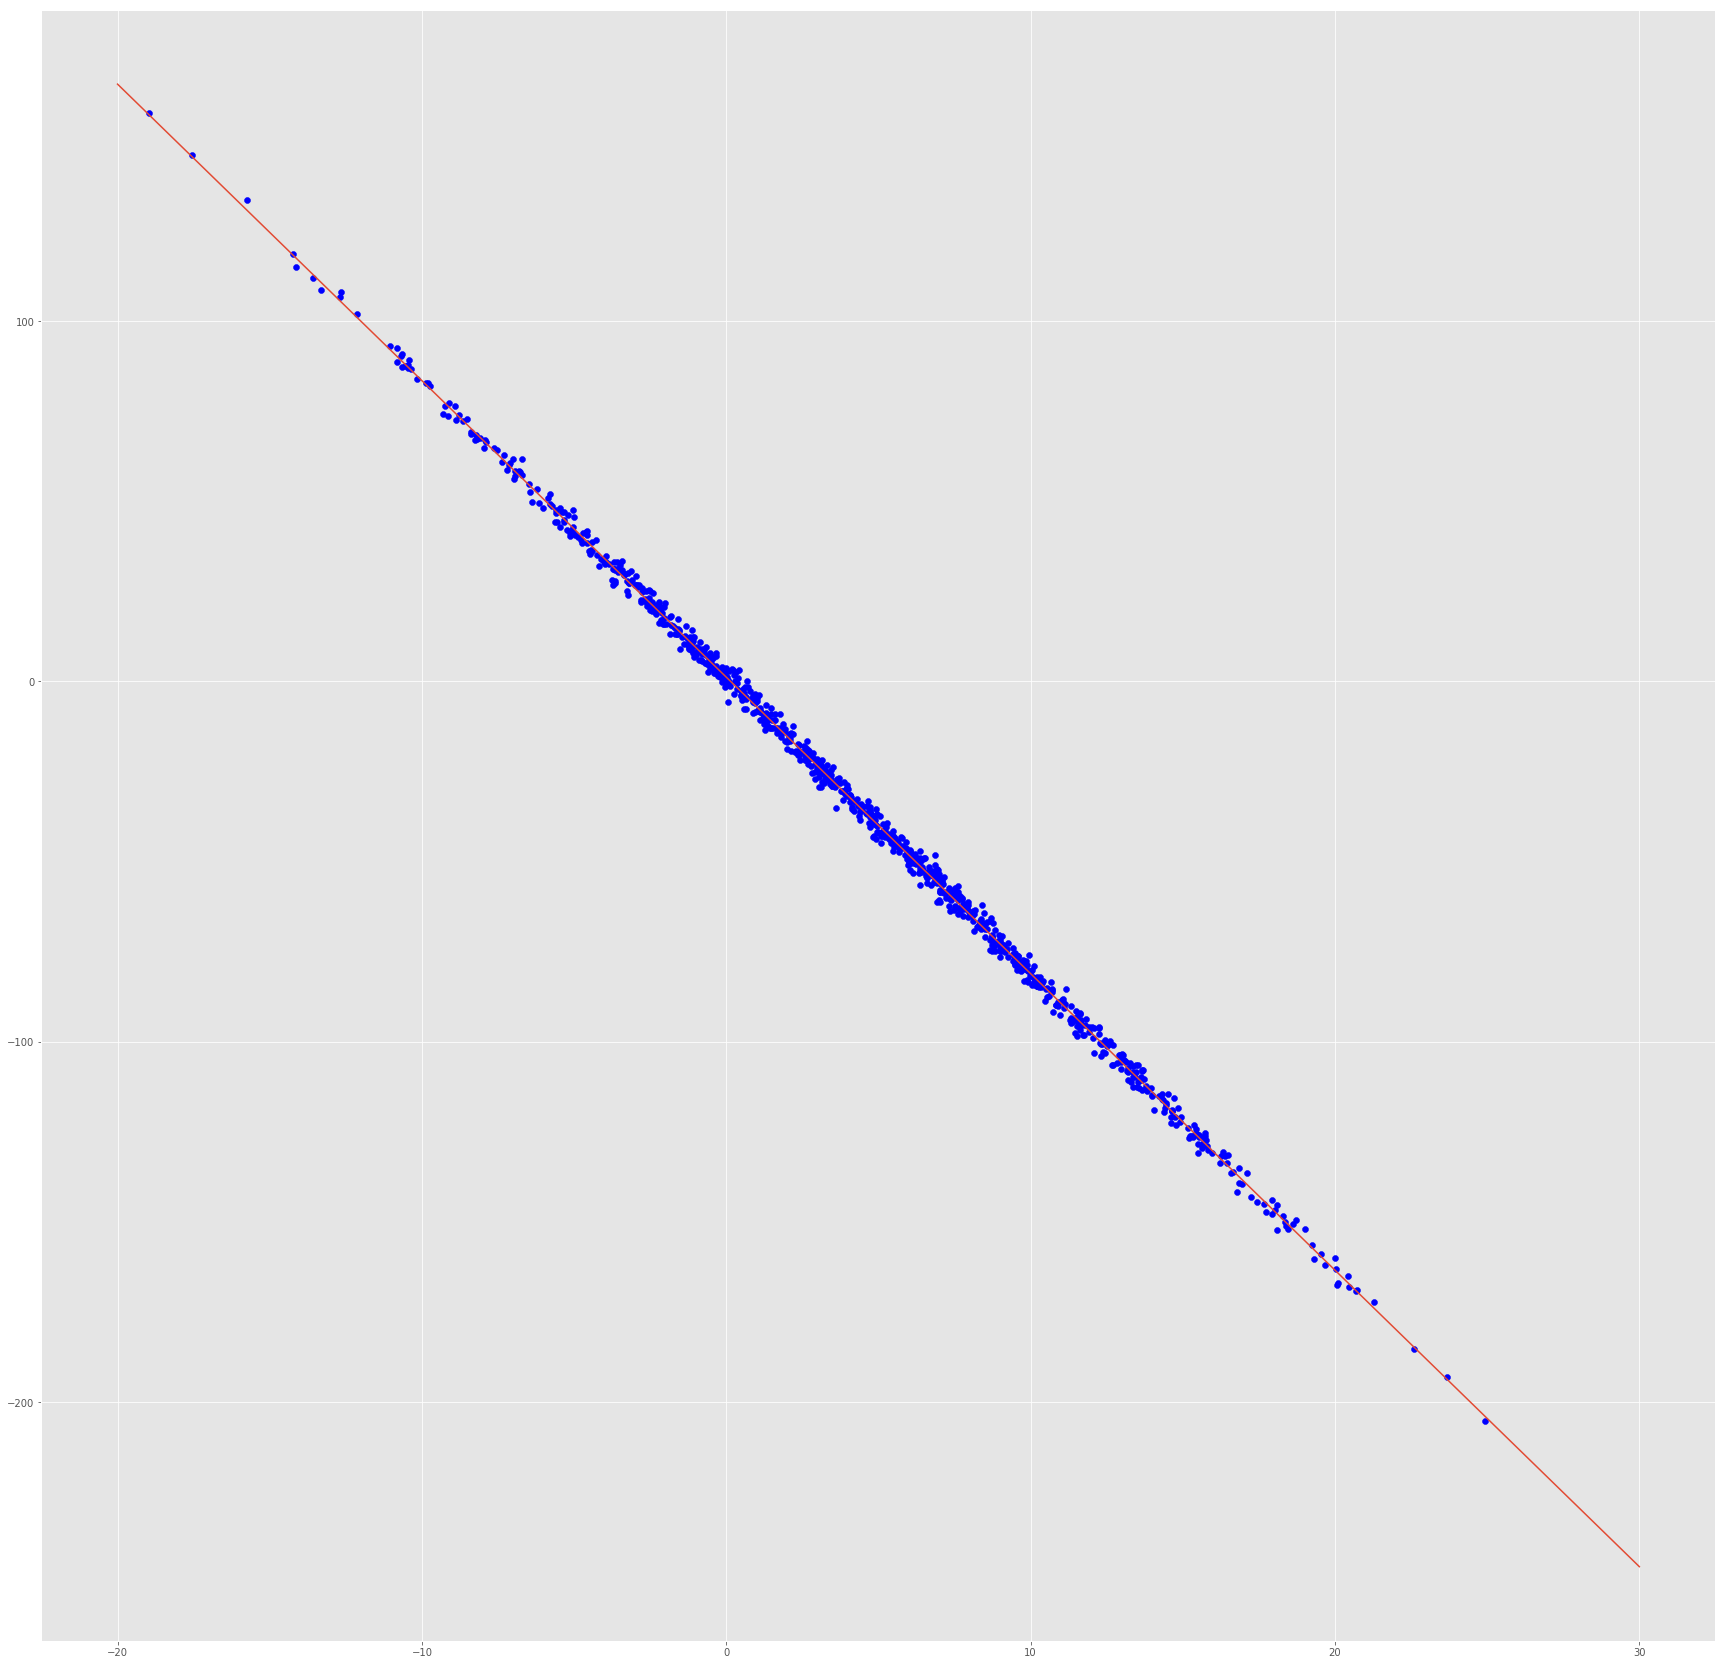

In [55]:
##Build a regression model from scratch and demonstrate that it recovers the true values of $\beta$s. 
xt = np.vstack((np.ones(len(x_1)), x_1))
xt = xt.T
yt = y.T
xtx = np.dot(xt.T, xt)
xtx_inv = np.linalg.inv(xtx)
xtyt = np.dot(xt.T, yt)
b = np.dot(xtx_inv, xtyt)
print('the true value of beta is \n',b[1])
y0 =  b[0] + b[1]*(-20)
y20 = b[0] + b[1]*30
plt.scatter(x_1, yt, color='b')
plt.plot([-20, 30], [y0, y20]) 
plt.show()

the true value of beta is 
 [[-8.22756682]]


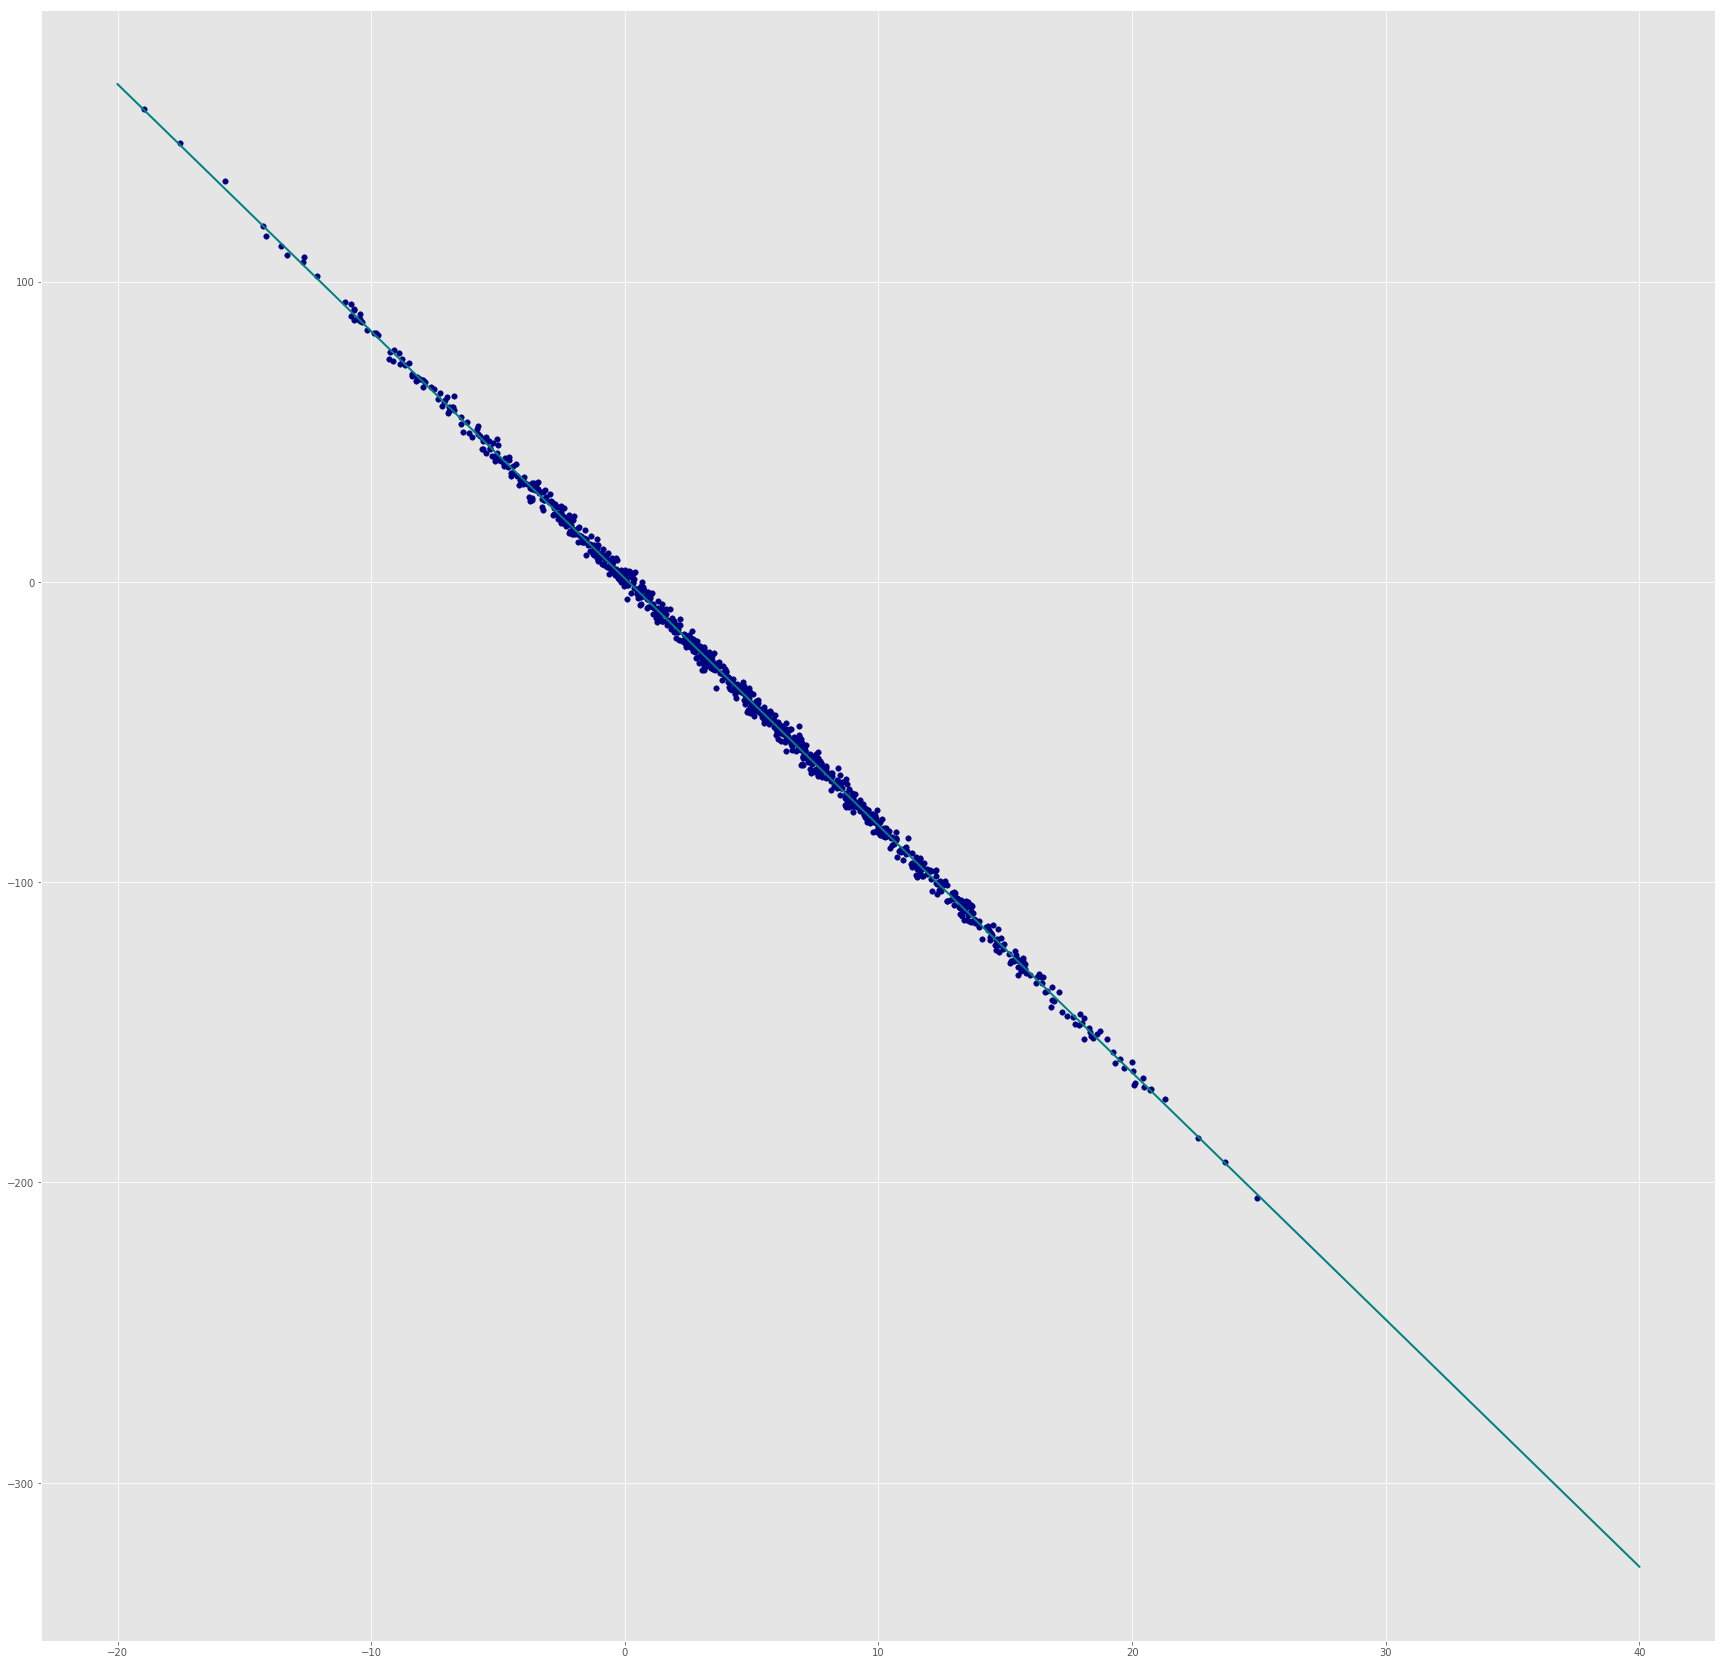

In [56]:
##Repeat the exercise with Scikit Package.
from sklearn import linear_model
plt.scatter(x_1, y, color='navy', s=30, marker='o')
X = x_1[:, np.newaxis] # another way to convert row to col vector
Y = y[:, np.newaxis]
regr = linear_model.LinearRegression()
regr.fit(X, Y)
x_plot = np.linspace(-20, 40, 100)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal',linewidth=2)
## beta1 and beta0
print('the true value of beta is \n',regr.coef_)
plt.show()

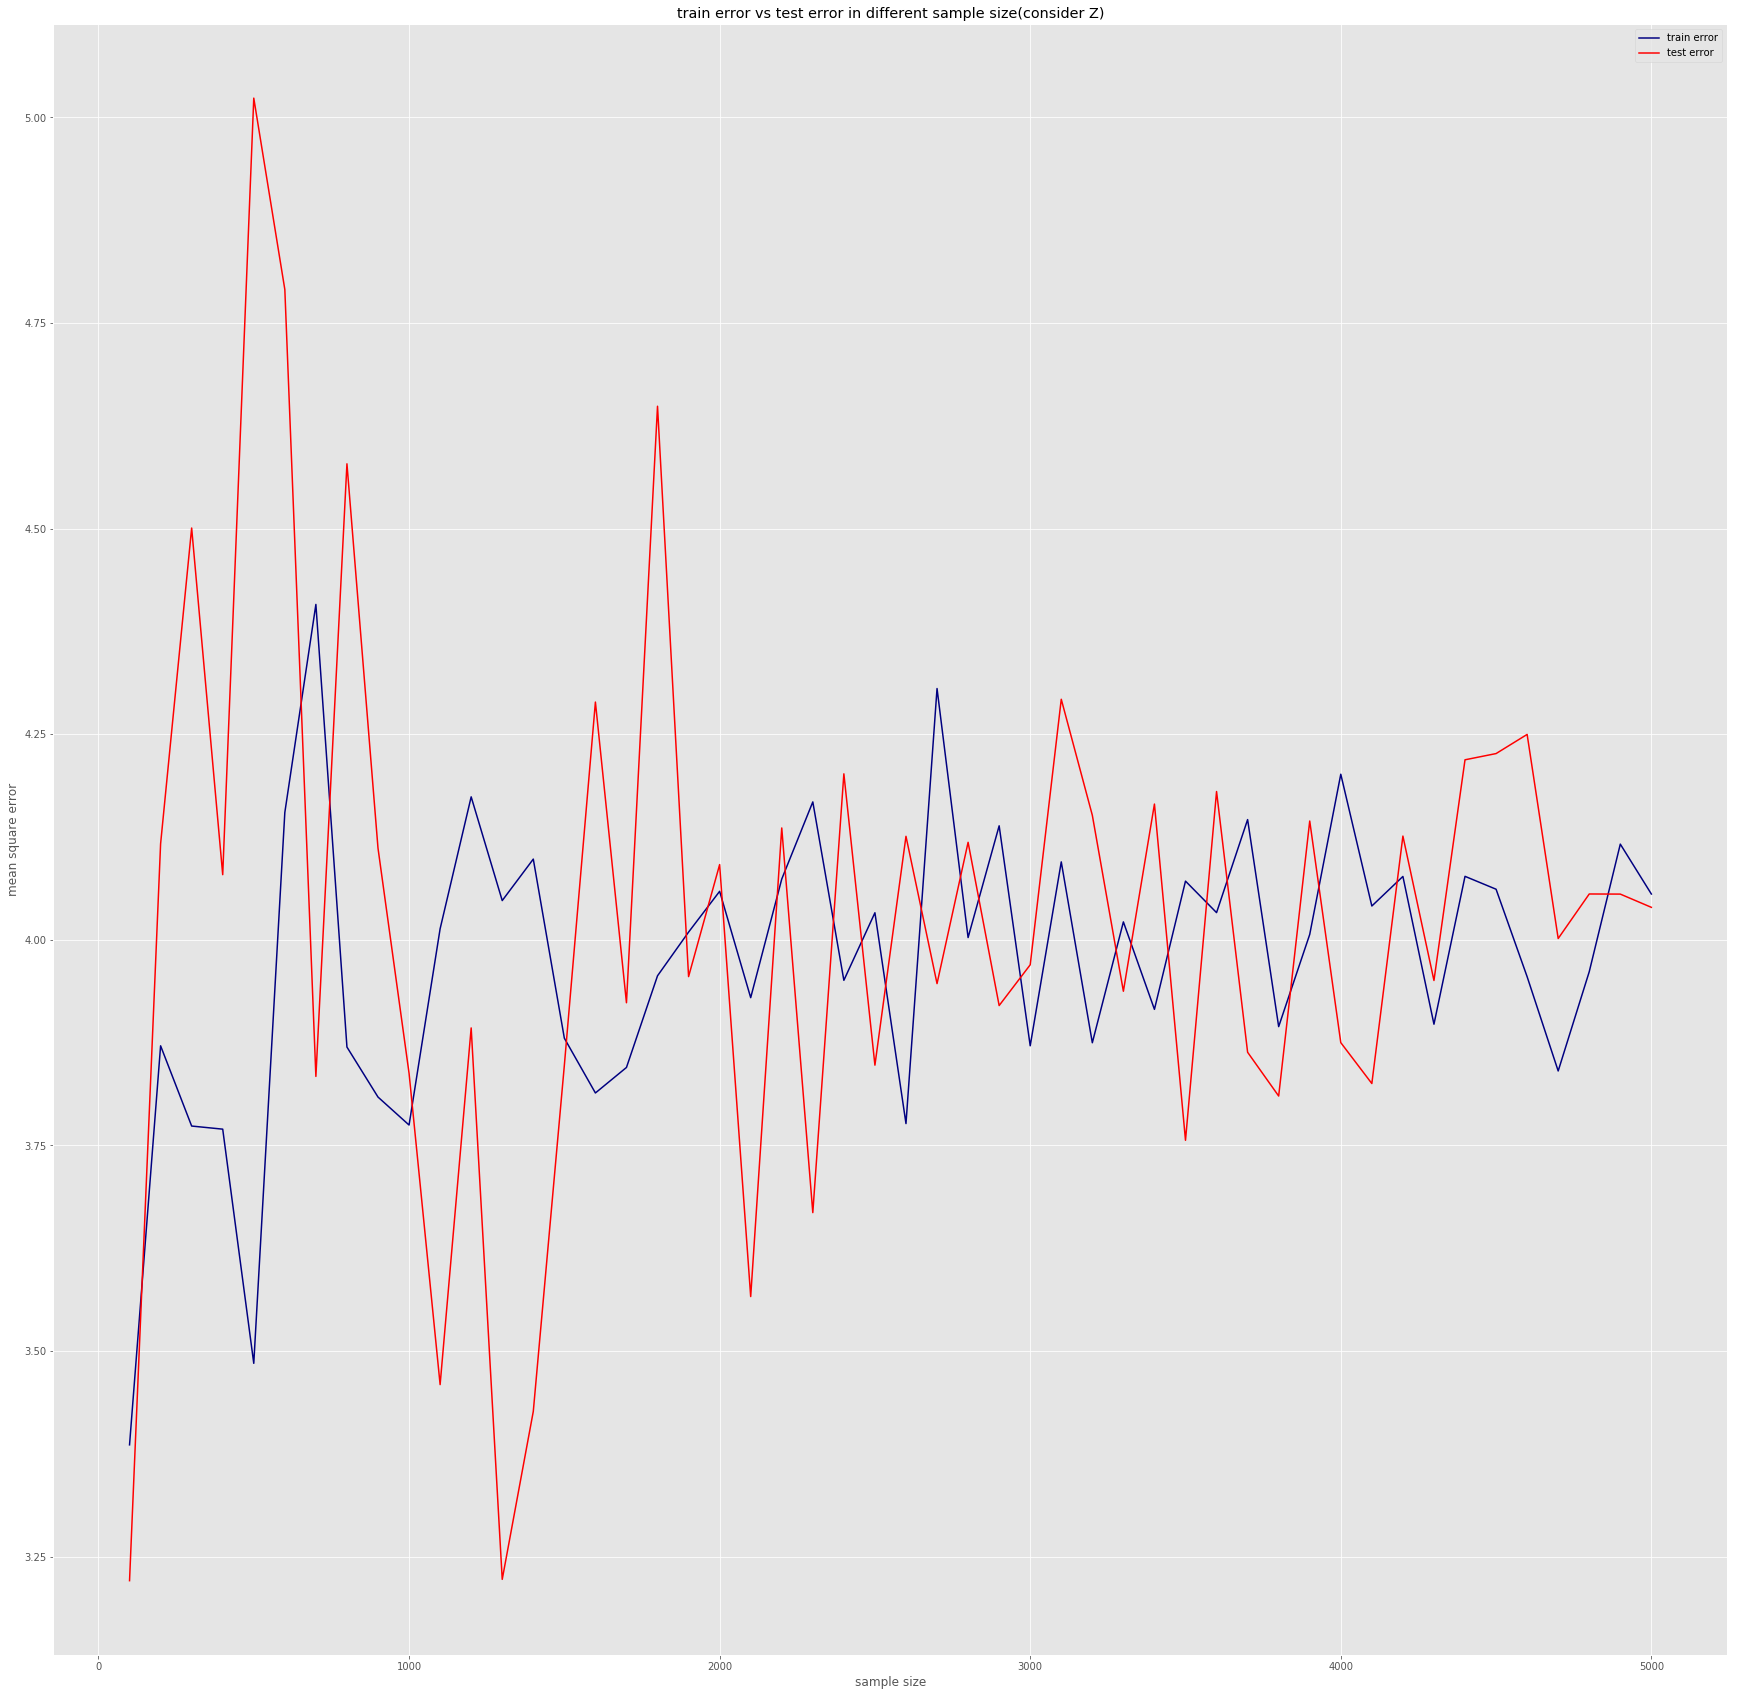

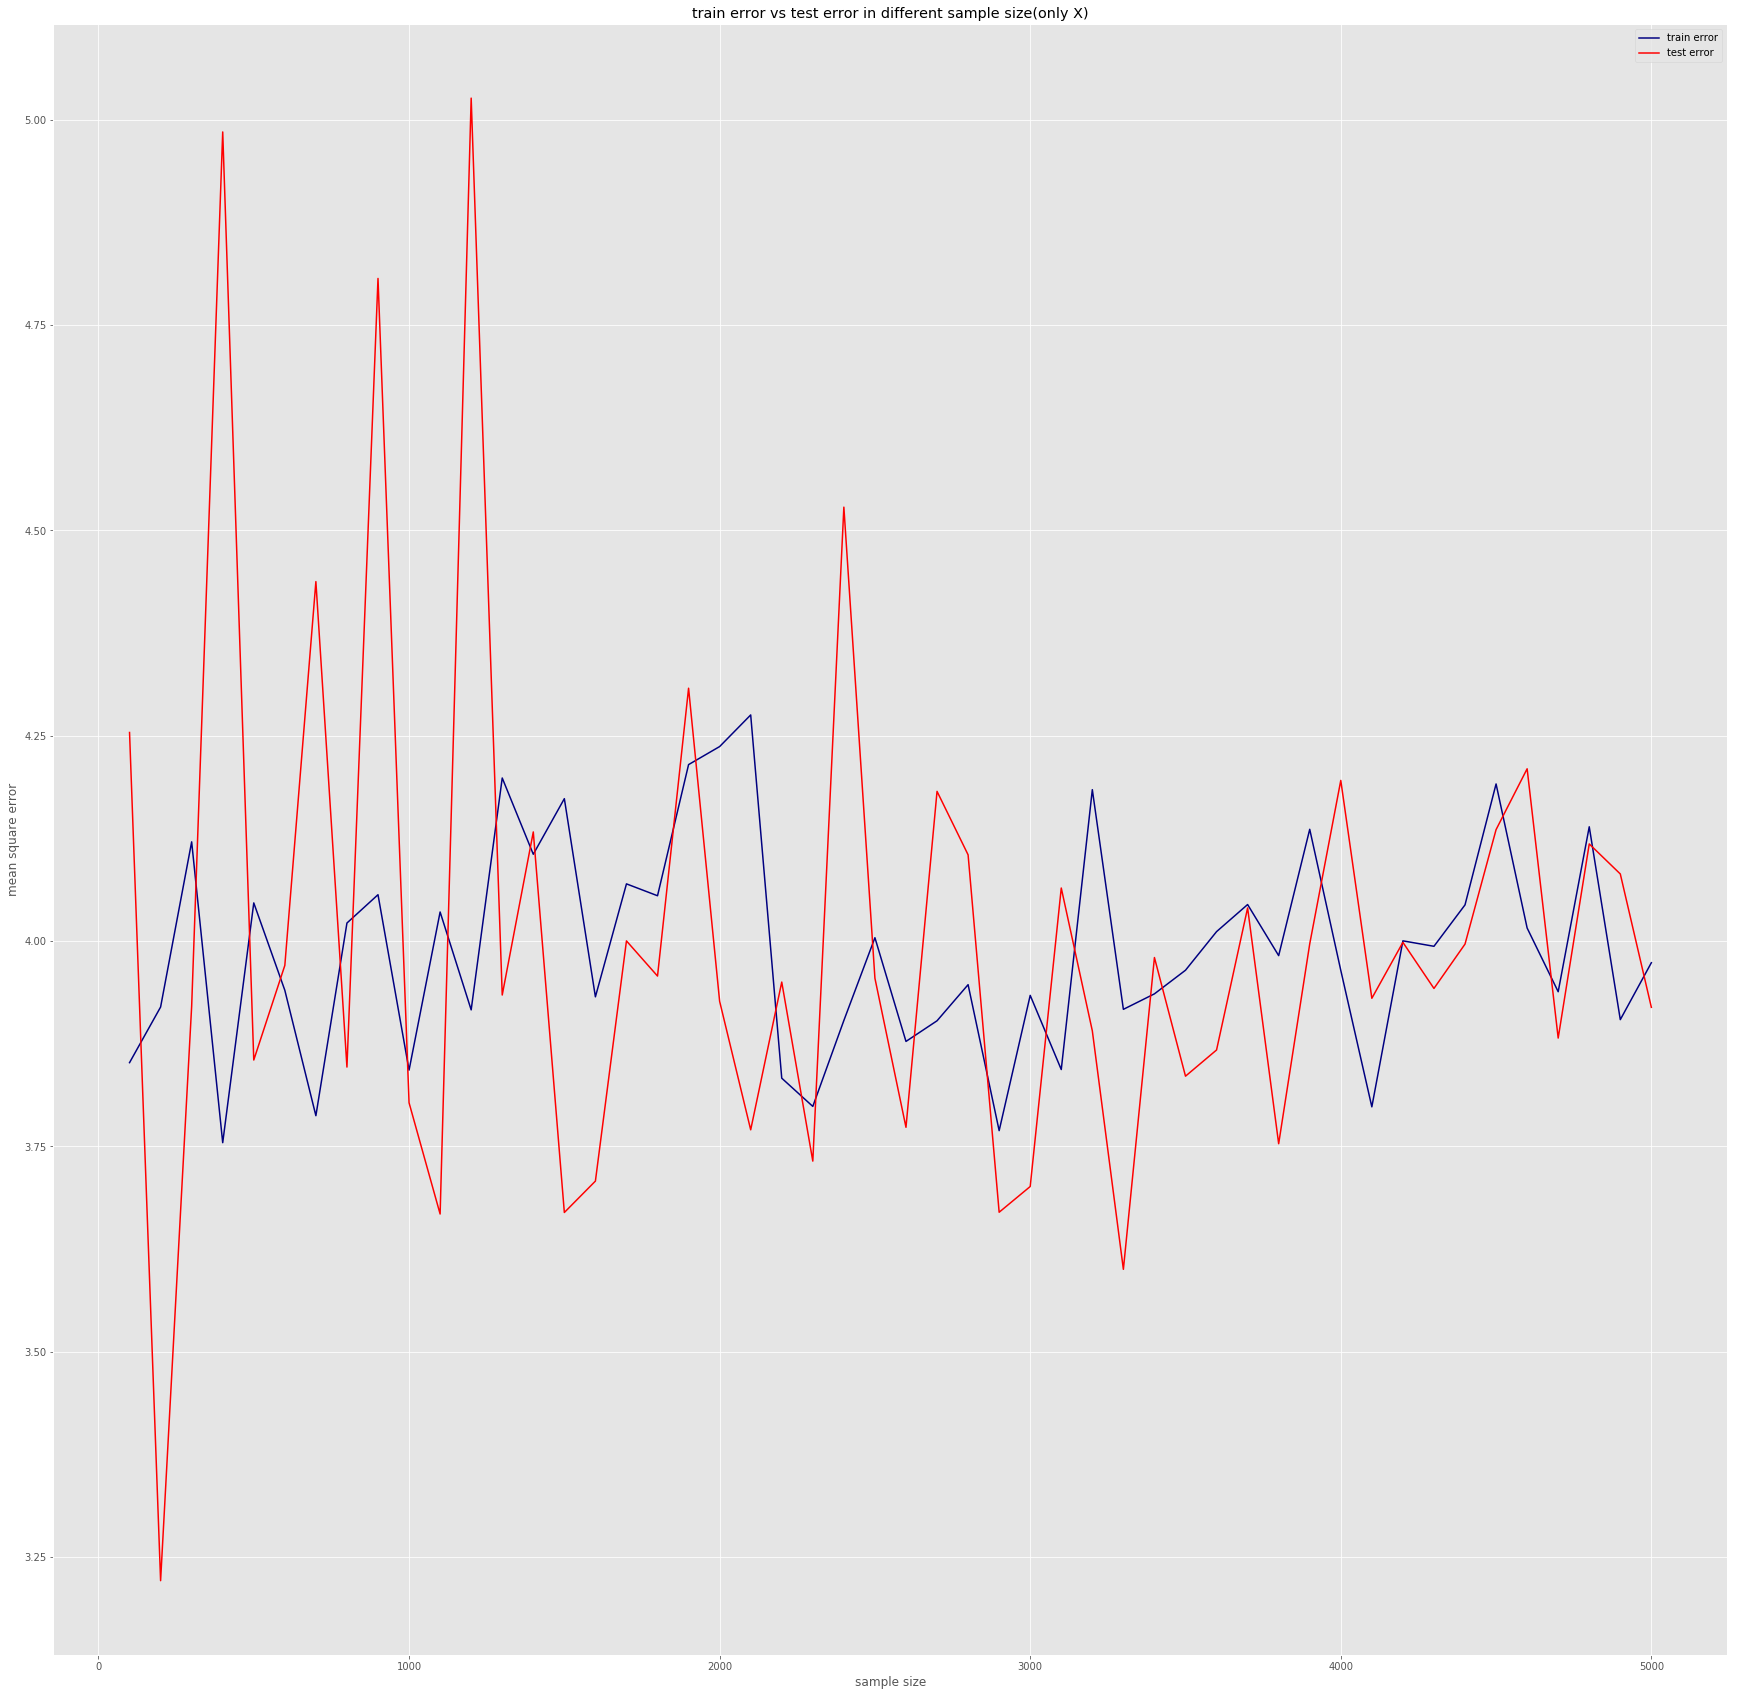

In [57]:
##Create a new variable, Z, that is equal to x_1^2. Include this as one of the predictors in your model. 
##See what happens when you fit a model that depends on x_1 only and then also on Z. 
##For this exercise you will evaluate the model for different sample sizes starting from  100 to 5000 with an increment of 100 samples. 
##You will split your samples into training and test set (80%/20%) using  "train_test_split" function available in the Scikit package. 
##Plot the mean square error of the training set and of the test set versus sample sizes for both models (one with x_1 only and the other that includes Z).
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches

regr1 = linear_model.LinearRegression(n_jobs=-1)
mse_train1=[]
mse_test1=[]
sample_size=[]
#generate data sample
for i in range(100,5100,100):
    sample_size.append(i)
    x_1 = np.random.normal(mean, stdDev, i)
    # generate normal noise with mean as 0 and standard deviation of $2$
    trueError = np.random.normal(0, 2, i)
    # beta parameters used for generating the data
    trueBeta0 = 1.1 
    trueBeta1 = -8.2 
    # generate data 
    y = trueBeta0 + trueBeta1 * x_1 + trueError
    X = x_1[:, np.newaxis] # another way to convert row to col vector
    Y = y[:, np.newaxis]
    degree = 2
    poly = PolynomialFeatures(degree)
    XPZ = poly.fit_transform(X)
    #regr.fit(XPZ, Y)
    X_train, X_test, y_train, y_test = train_test_split(
    XPZ, Y, test_size=0.2, random_state=42)
    regr1.fit(X_train, y_train)
    pred_trainy=regr1.predict(X_train)
    #print(pred_trainy)
    pred_testy=regr1.predict(X_test)
    mse_train1.append(mean_squared_error(pred_trainy,y_train))
    mse_test1.append(mean_squared_error(pred_testy,y_test))
    
    
    
##plot graph
mse_train1 = np.asarray(mse_train1)
mse_test1 = np.asarray(mse_test1)
sample_size = np.asarray(sample_size)
plt.plot(sample_size, mse_train1,color='navy',label='train error')
plt.xlabel('sample size')
plt.ylabel('mean square error') 
plt.plot(sample_size, mse_test1, color='red', label='test error')
plt.title('train error vs test error in different sample size(consider Z)')
plt.legend()
plt.show()

mse_train=[]
mse_test=[]
sample_size=[]
for i in range(100,5100,100):
    sample_size.append(i)
    x_1 = np.random.normal(mean, stdDev, i)
    # generate normal noise with mean as 0 and standard deviation of $2$
    trueError = np.random.normal(0, 2, i)
    # beta parameters used for generating the data
    trueBeta0 = 1.1 
    trueBeta1 = -8.2 
    # generate data 
    y = trueBeta0 + trueBeta1 * x_1 + trueError
    X = x_1[:, np.newaxis] # another way to convert row to col vector
    Y = y[:, np.newaxis]
    X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
    regr1.fit(X_train, y_train)
    pred_trainy=regr1.predict(X_train)
    #print(pred_trainy)
    pred_testy=regr1.predict(X_test)
    mse_train.append(mean_squared_error(pred_trainy,y_train))
    mse_test.append(mean_squared_error(pred_testy,y_test))
    
    
    
##plot graph
mse_train = np.asarray(mse_train)
mse_test = np.asarray(mse_test)
sample_size = np.asarray(sample_size)
plt.plot(sample_size, mse_train,color='navy', label='train error')
plt.xlabel('sample size')
plt.ylabel('mean square error') 
plt.plot(sample_size, mse_test, color='red', label='test error')
plt.title('train error vs test error in different sample size(only X)')
plt.legend()
plt.show()



### Exercise 2: For this exercise you will use real estate sale data for Brooklyn available in the resource folder on Blackboard (rollingsales_brooklyn). 

<ul>
<li>Analyze sales using regression with any predictors you feel are relevant. Justify why regression was appropriate to use.
<li>Visualize the coefficients and fitted model.
<li>Predict the neighborhood using a k-NN classifier. Be sure to withhold a subset of the data for testing. Find the variables and the k that give you the lowest prediction error.
<li>Report and visualize your findings.
<li>Describe any decisions that could be made or actions that could be taken from this analysis.
</ul>

In [58]:
import pandas as pd
from sklearn import preprocessing
#import data as df
df = pd.read_csv('resources/rollingsales_brooklyn.csv')
df= df.replace(0,np.nan)
#df= df.replace(r'\s+', np.nan, regex=True)

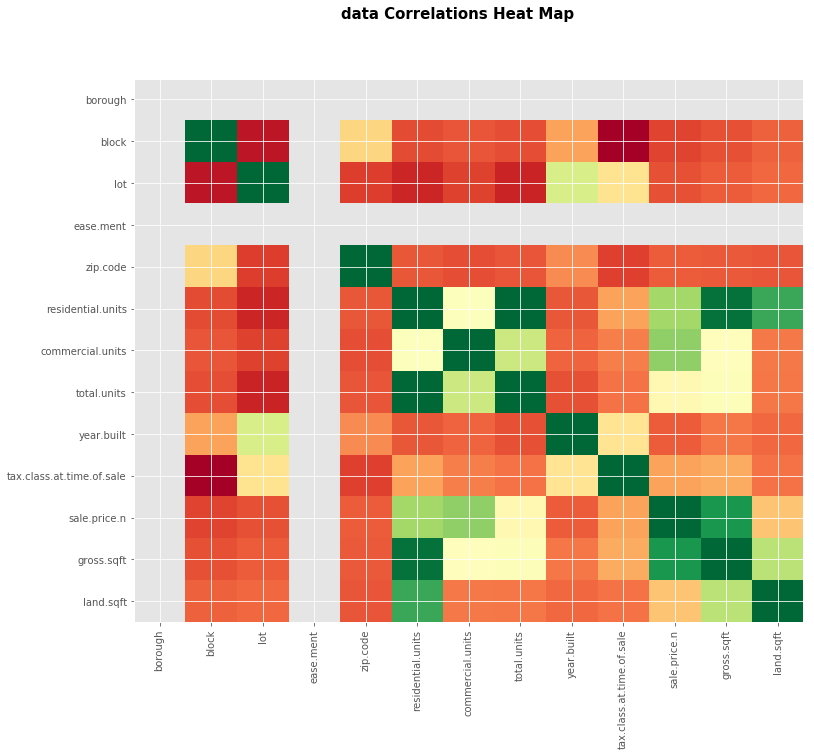

the most corrlated column to sale price is gross square feet.


In [59]:
#plot heat map of corrlation of different column
corr_data=df.corr()
plt.figure(figsize=(12, 10))
plt.imshow(corr_data, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.xticks(range(len(corr_data)), corr_data.columns, rotation='vertical')
plt.yticks(range(len(corr_data)), corr_data.columns);
plt.suptitle('data Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()
print('the most corrlated column to sale price is gross square feet.')

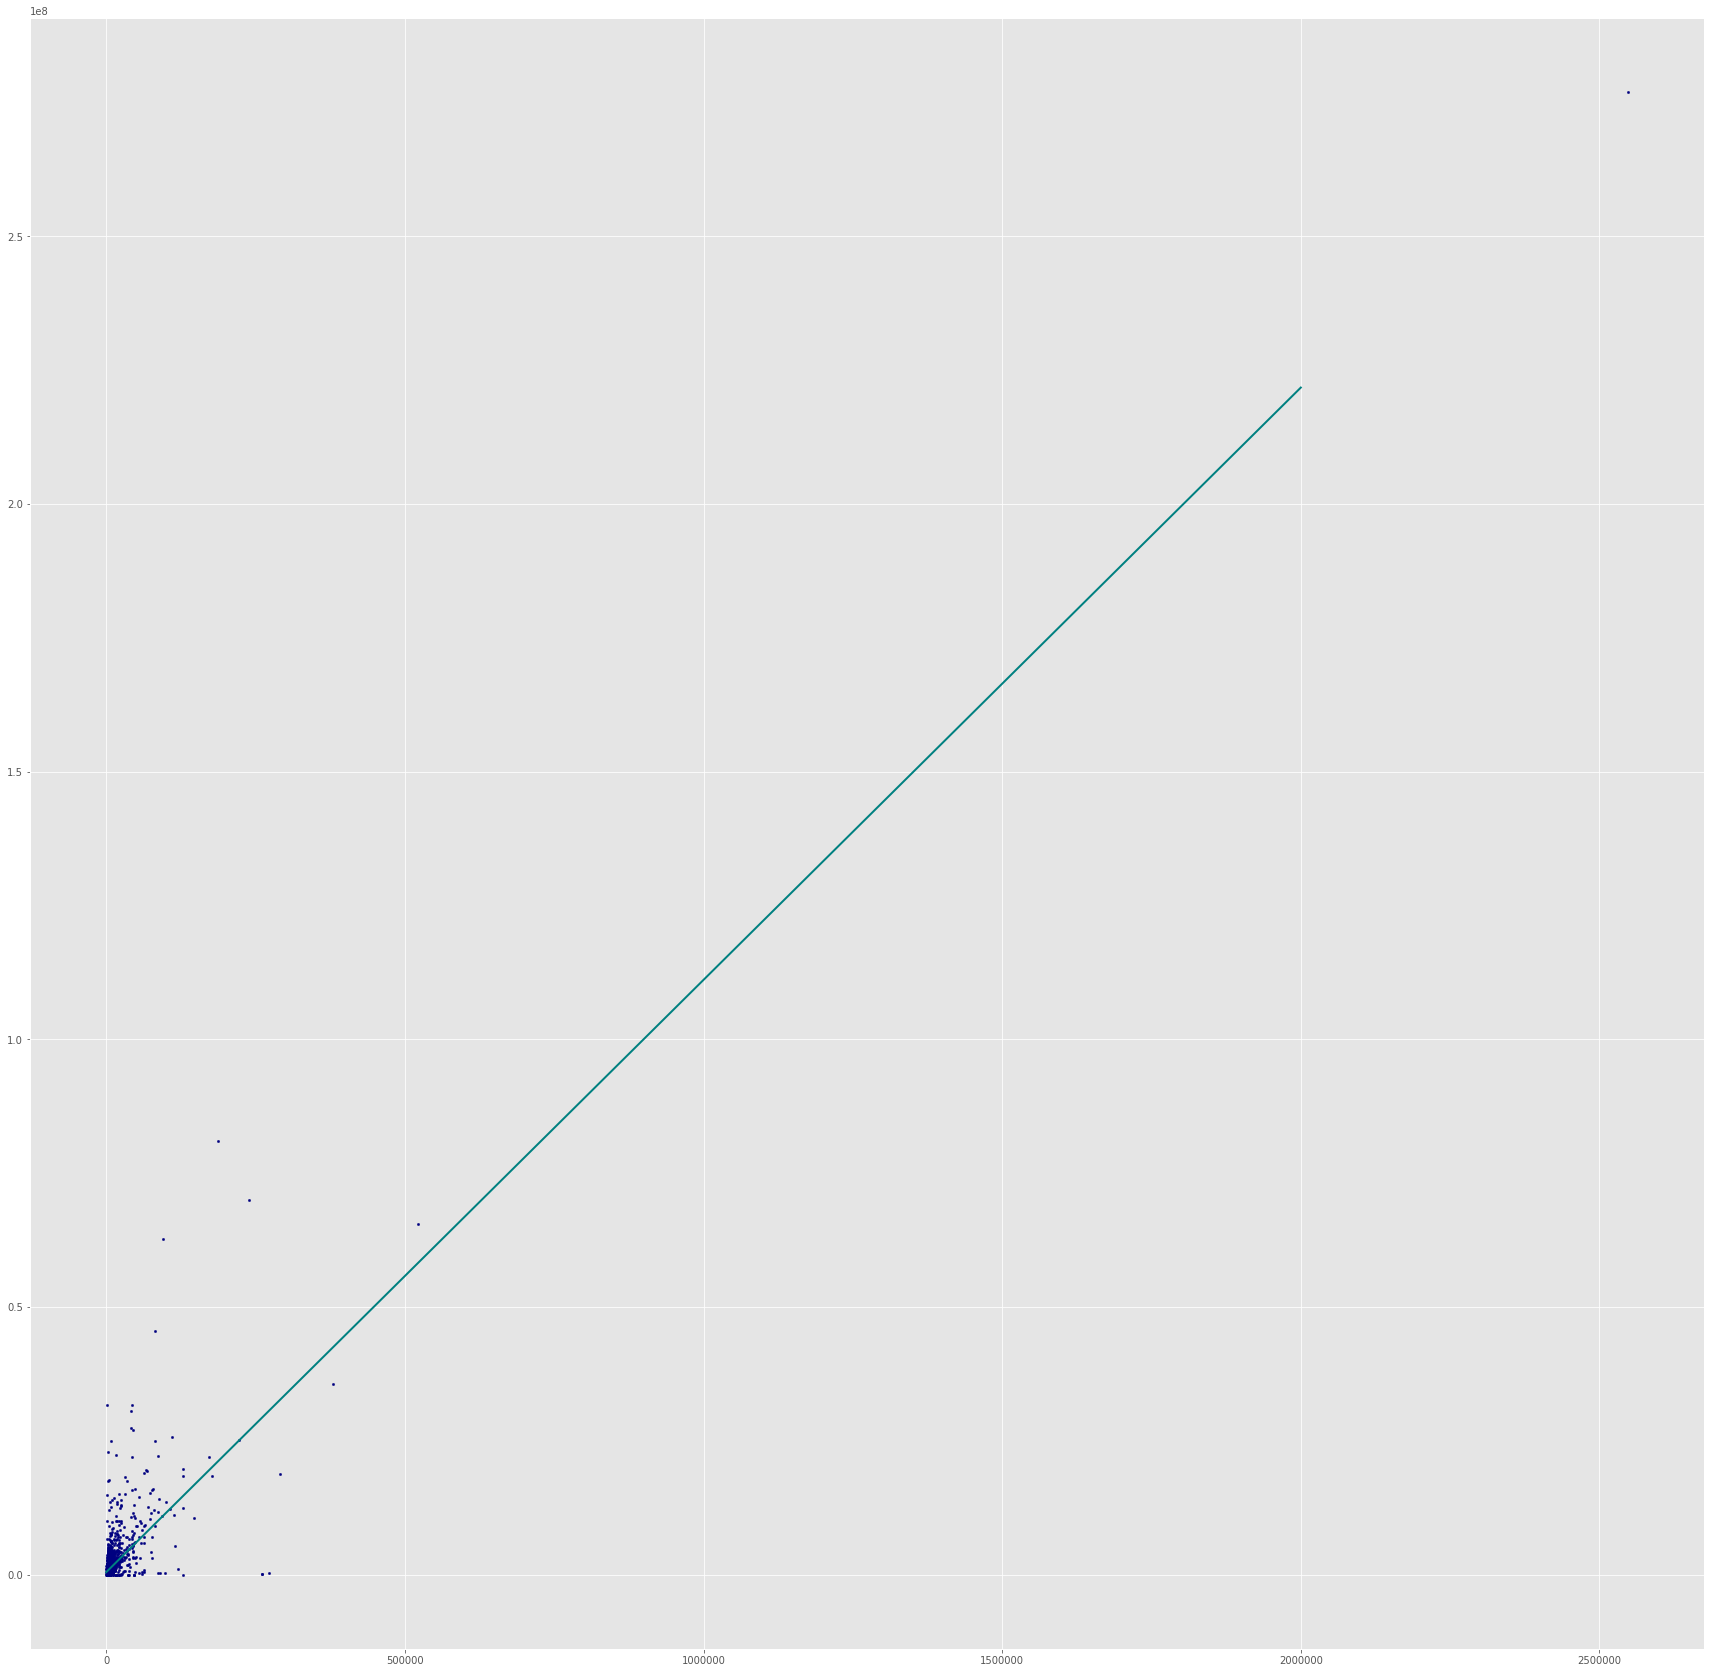

the coefficient is 
 [[ 110.63900328]]


In [60]:
#abstract price and gross square feets
price=df.pop('sale.price.n')
gross_sf=df.pop('gross.sqft')
#cleaning data and get rid of all 0 data
df1=pd.concat([gross_sf, price], axis=1)
df1= df1.replace(0,np.nan)
df1=df1.dropna(axis=0)

#regression
X_sqft=df1['gross.sqft']
Y_price=df1['sale.price.n']
#print(Y_price.shape)

X_sqft = X_sqft[:, np.newaxis] # another way to convert row to col vector
Y_price = Y_price[:, np.newaxis]
plt.scatter(X_sqft,Y_price, color='navy', s=5, marker='o')
regr.fit(X_sqft,Y_price)
x_plot = np.linspace(-1, 2000000, 100)
X_plot = x_plot[:, np.newaxis]
y_plot = regr.predict(X_plot)
plt.plot(x_plot, y_plot, color='teal',linewidth=2)
plt.show()
print('the coefficient is \n',regr.coef_)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number 

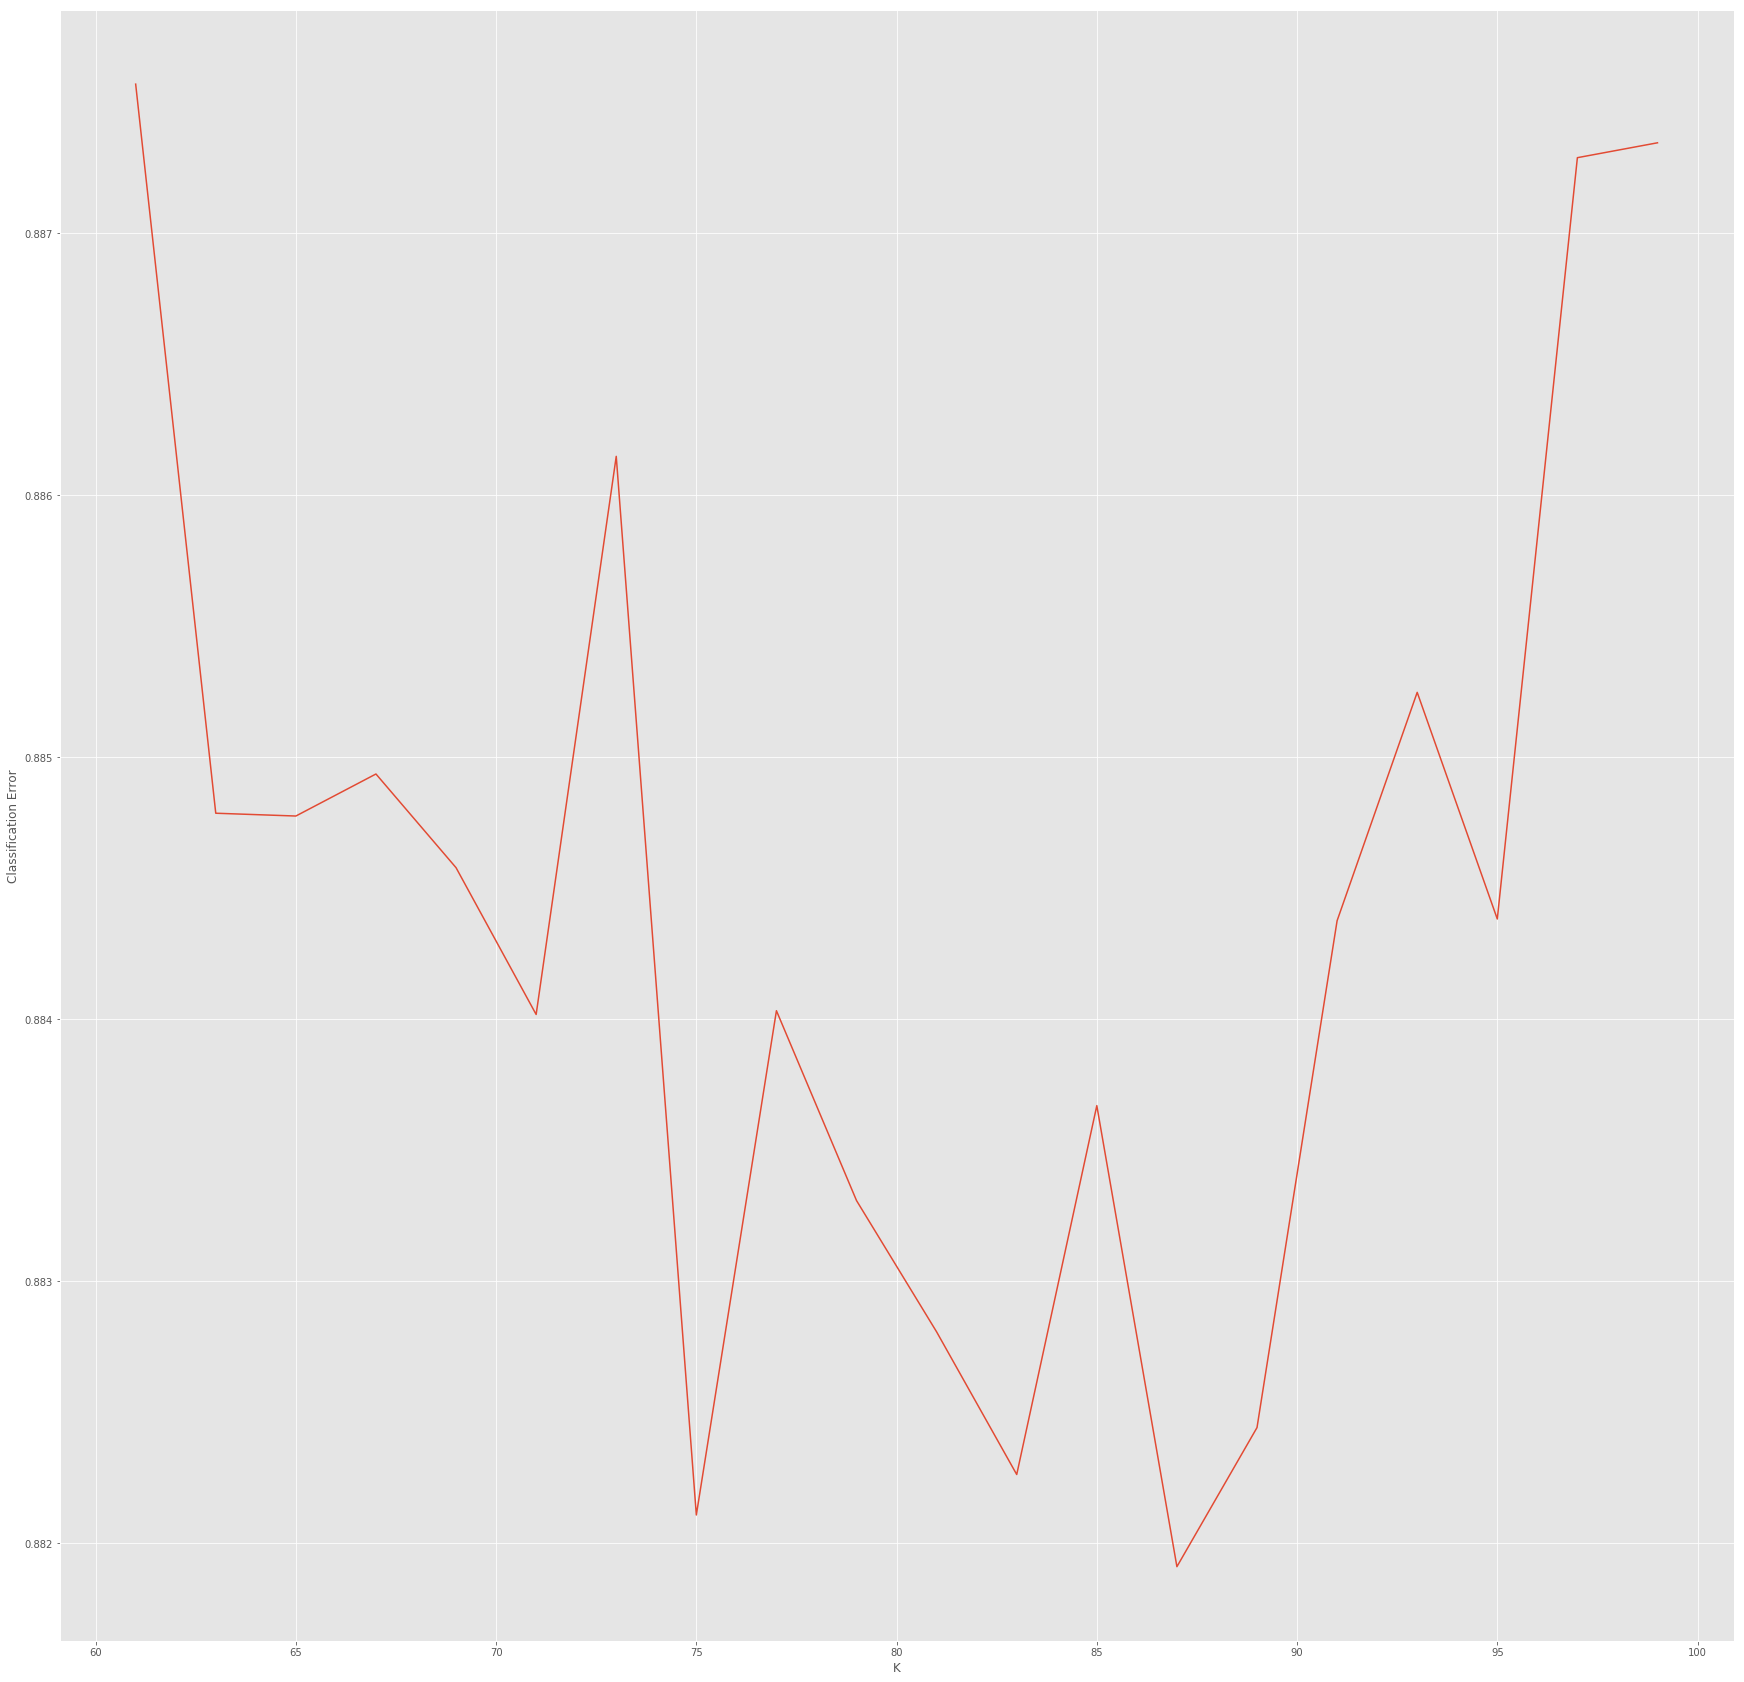

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
df = pd.read_csv('resources/rollingsales_brooklyn.csv')
#put price square feet and neighbor together
price=df.pop('sale.price.n')
gross_sf=df.pop('gross.sqft')
neighbor=df.pop('neighborhood')
df2=pd.concat([gross_sf, price,neighbor], axis=1)
df2= df2.replace(0,np.nan)
df2=df2.dropna(axis=0)
category=np.array(df2.pop('neighborhood'))
df2a=df2.as_matrix()
#category.astype('category')#contain 61 types
X_train3, X_test3, y_train3, y_test3 = train_test_split(
df2a, category, test_size=0.33, random_state=42)
#m = len(y_test)
#pred = np.empty(m, dtype=object)
accuracy_array = []
k_array = []
for k in range(61,101,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train3, y_train3, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [62]:
from sklearn.metrics import accuracy_score

min_ind = np.argmin(class_error)
OptK = k_array[min_ind]
print ("Optimal value of K is %d " %  OptK)
# Use Optimal value of K for test set
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train3, y_train3)

# predict
pred = knn.predict(X_test3)
#print(X_train3)
# evaluate accuracy
print('the prediction accuracy is only',accuracy_score(y_test3, pred)*100,'%')
print('the total categories are 61. we should select less categories for neighbor column.')

Optimal value of K is 87 
the prediction accuracy is only 11.5315958586 %
the total categories are 61. we should select less categories for neighbor column.


### Exercise 3: For this exercise you will use financial data from Yahoo web site. 

<ul>
<li>Get the Data: Go to Yahoo! Finance and download daily data for a stock that has at least eight years of data, making sure it goes from earlier to later. 
<li> Create the time series of daily log returns of the stock price. Note that log return at time $t$ is defined as $\log {S_t/S_{t-1}}$, where $S_t$ is price of asset at time $t$ and $S_{t-1}$ is price of asset at time $t-1$. Do the same for volume data (i.e., create the time series of daily log changes in volume).
<li> Next, set up a linear regression model that uses the past two returns to predict the next return. Run it and see if you can make any money with it. Try it for both stock returns and volumes. 
</ul>

In [76]:
sp = pd.read_csv('resources/GSPC.csv')
sp = sp[['Date','Adj Close','Volume']]
#calculate past today return
sp['log_ret_price_today'] = np.log(sp['Adj Close'])/np.log(sp['Adj Close'].shift(1))
#calculate  yesterday return
sp['log_ret_price_yesterday'] = np.log(sp['Adj Close'].shift(1))/np.log(sp['Adj Close'].shift(2))
#calculate the day before yesterday yesterday return
sp['log_ret_price_2days'] = np.log(sp['Adj Close'].shift(2))/np.log(sp['Adj Close'].shift(3))

sp['log_ret_volume_today'] =np.log(sp['Volume'])/np.log(sp['Volume'].shift(1))
sp['log_ret_volume_yesterday'] =np.log(sp['Volume'].shift(1))/np.log(sp['Volume'].shift(2))
sp['log_ret_volume_2days']=np.log(sp['Volume'].shift(2))/np.log(sp['Volume'].shift(3))
#fill nan with 1.
_ = sp.fillna(1, inplace=True)


In [77]:
price_r=sp[['log_ret_price_today','log_ret_price_yesterday','log_ret_price_2days']]
regr3 = linear_model.LinearRegression(n_jobs=-1)
X_price= price_r[['log_ret_price_yesterday','log_ret_price_2days']]
y_price= price_r['log_ret_price_today']
#y_price=y_price[:,np.newaxis]
X_train4, X_test4, y_train4, y_test4 = train_test_split(
X_price, y_price, test_size=0.33,shuffle=False)
regr3.fit(X_train4,y_train4)
pred_price=regr3.predict(X_test4)
regr3.score(X_test4,y_test4)

-0.014289553663423105

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


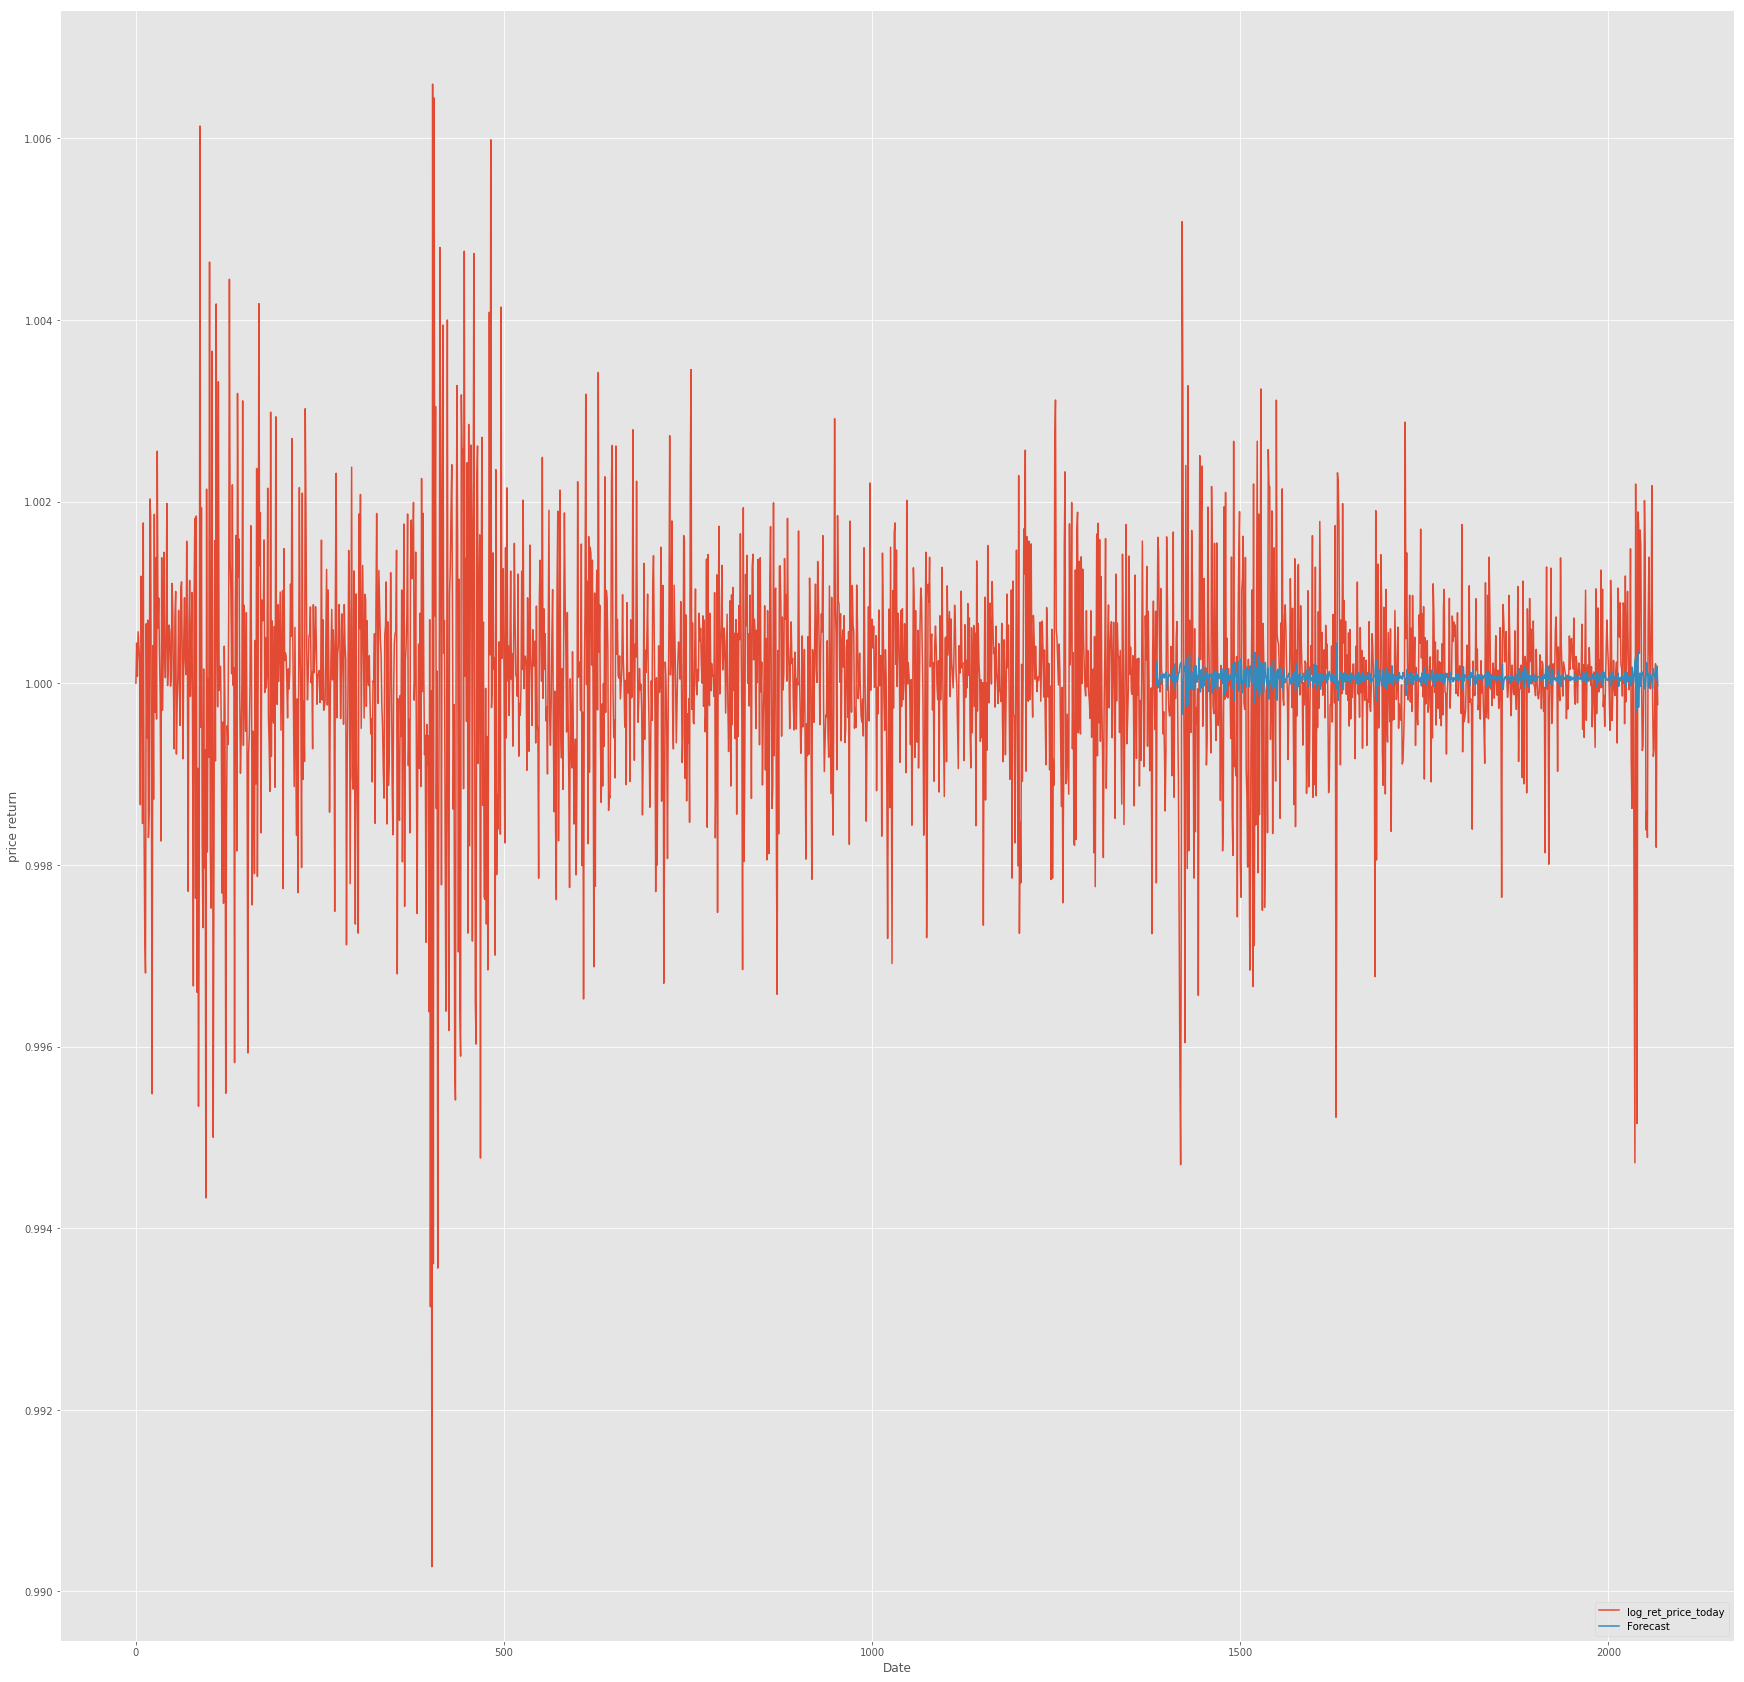

In [73]:
forecast_set = regr3.predict(X_test4)
num_samples = sp.shape[0]
from matplotlib import style
#add Forecase column to dataframe
sp['Forecast'] = np.nan
sp['Forecast'][int(0.67*num_samples):num_samples]=forecast_set
style.use('ggplot')
sp['log_ret_price_today'].plot()
sp['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('price return')
plt.rcParams['figure.figsize'] = (30,30)
plt.show()

In [74]:
volume_r=sp[['log_ret_volume_today','log_ret_volume_yesterday','log_ret_volume_2days']]
X_vol= volume_r[['log_ret_volume_yesterday','log_ret_volume_2days']]
y_vol= volume_r['log_ret_volume_today']


regr4 = linear_model.LinearRegression()

X_train5, X_test5, y_train5, y_test5 = train_test_split(
X_vol, y_vol, test_size=0.33,shuffle=False)
regr4.fit(X_train5,y_train5)
pred_vol=regr4.predict(X_test5)
regr4.score(X_test5,y_test5)


0.13779217100193364

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


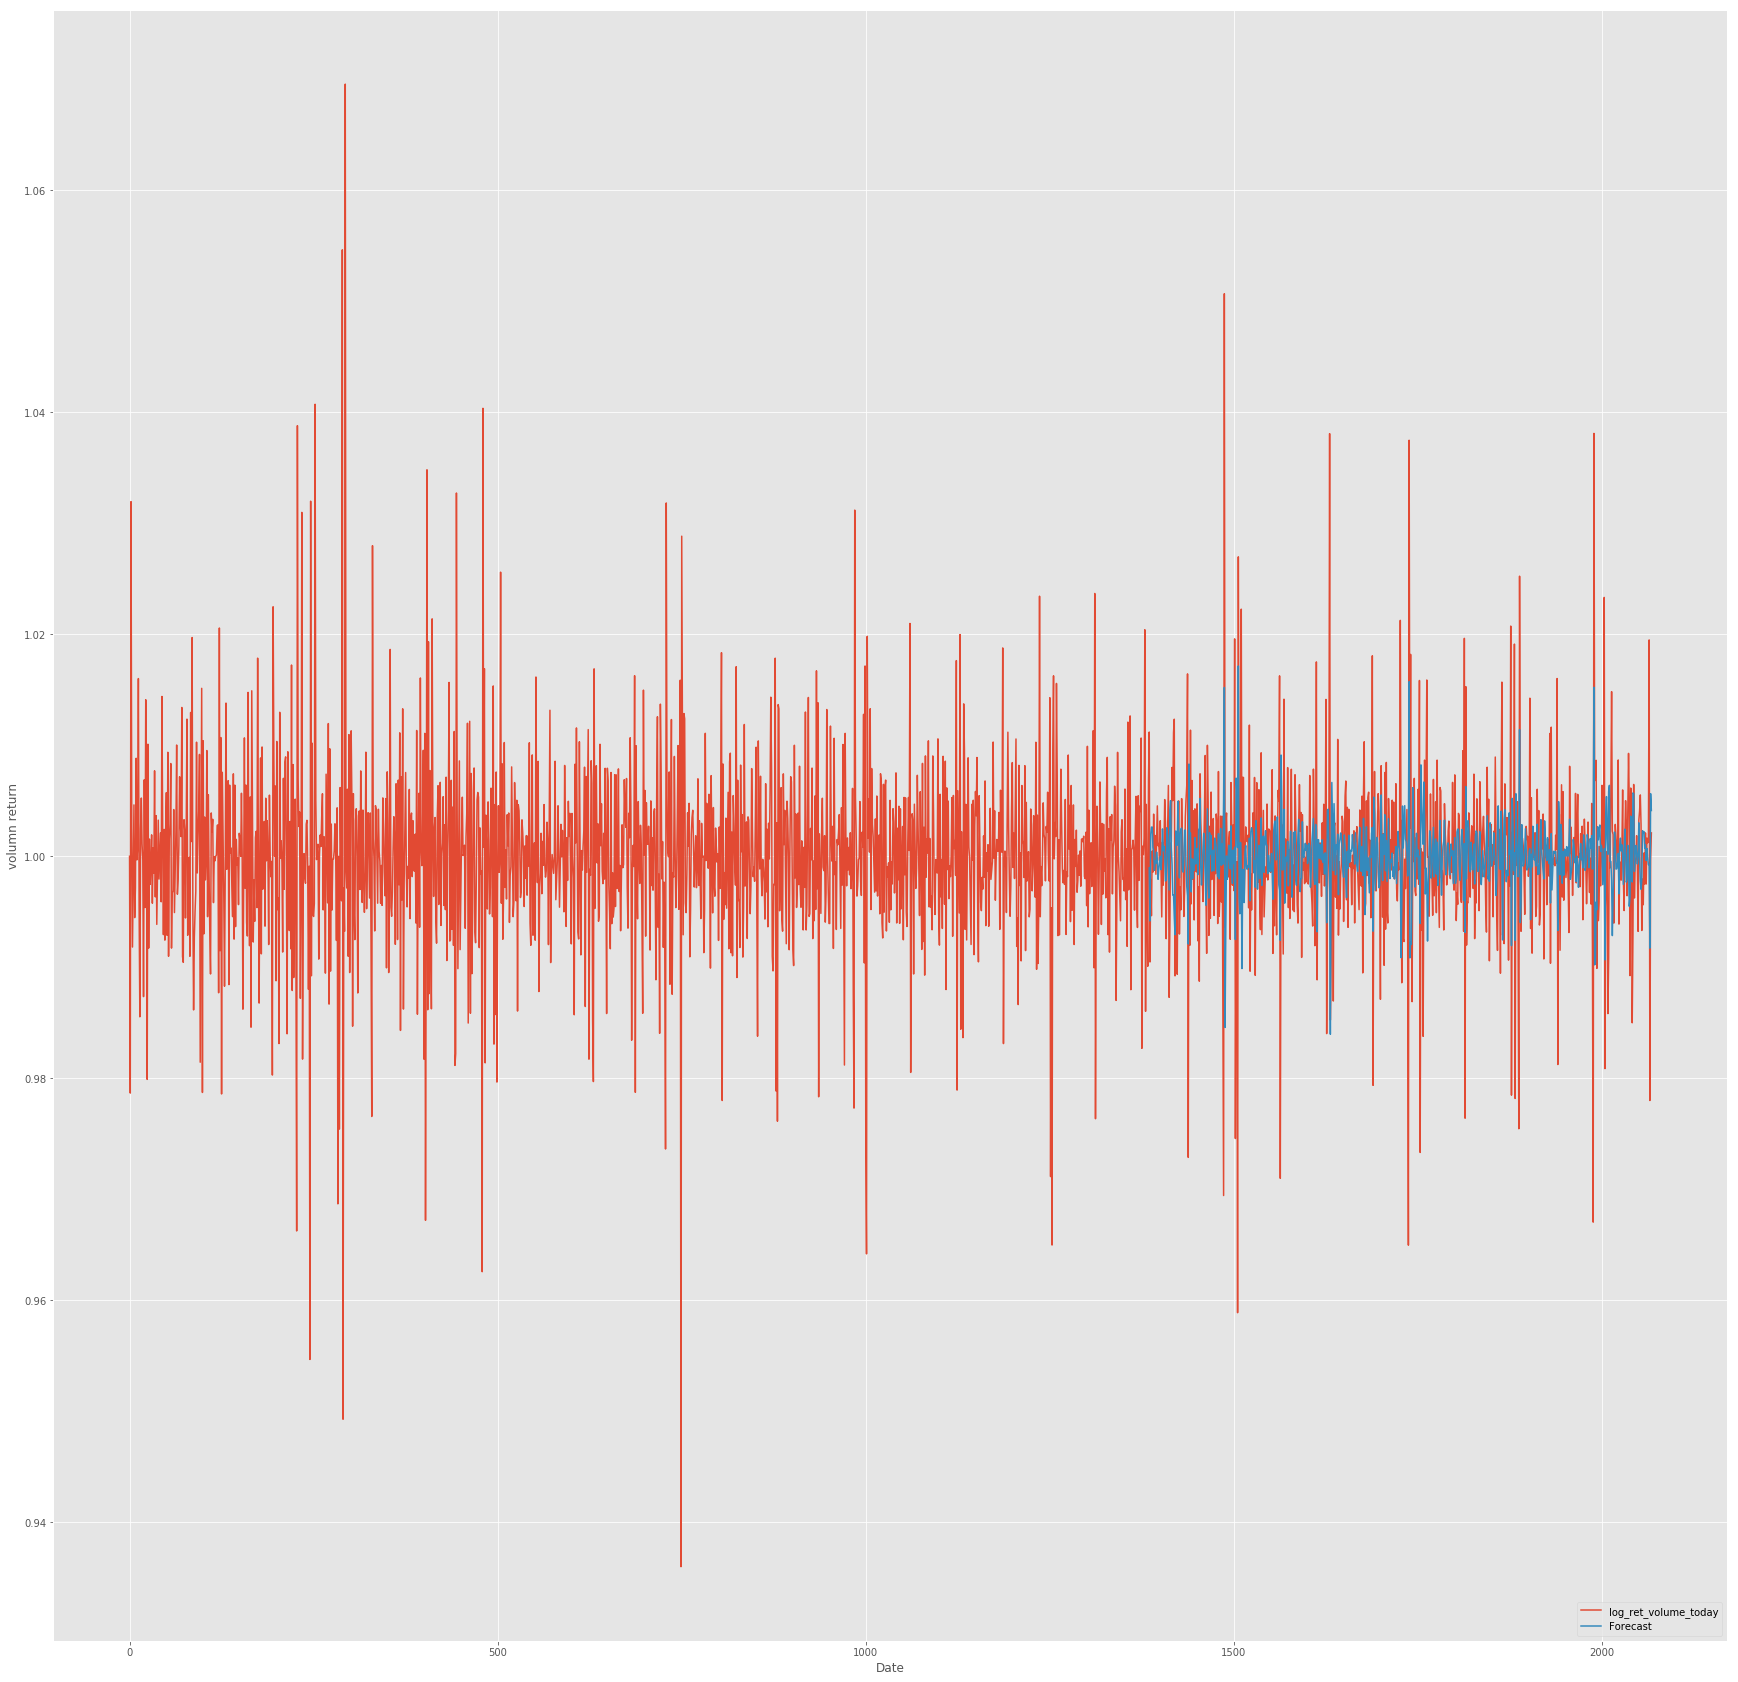

In [75]:
forecast_set2 = regr4.predict(X_test5)
num_samples = sp.shape[0]
from matplotlib import style
#add Forecase column to dataframe
sp['Forecast'] = np.nan
sp['Forecast'][int(0.67*num_samples):num_samples]=forecast_set2
style.use('ggplot')
sp['log_ret_volume_today'].plot()
sp['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('volumn return')
plt.rcParams['figure.figsize'] = (30,30)
plt.show()

<ul>we did not get good scores for this prediction. It means than we cannot make money for that.